In [17]:
import numpy as np
import torch
np.random.seed(2022254)
torch.manual_seed(2022254)

In [18]:
pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [19]:
from ultralytics.utils.downloads import download
from pathlib import Path

# Define dataset root directory
dir = Path("/kaggle/working/")

# Download validation images (5,000 images)
val_images_url = 'http://images.cocodataset.org/zips/val2017.zip'
download([val_images_url], dir / 'images')

# Download validation annotations
annotations_url = 'http://images.cocodataset.org/annotations/annotations_trainval2017.zip'
download([annotations_url], dir / 'annotations')

WARNING ⚠️ Skipping /kaggle/working/images/val2017.zip unzip as destination directory /kaggle/working/images/val2017 is not empty.
WARNING ⚠️ Skipping /kaggle/working/annotations/annotations_trainval2017.zip unzip as destination directory /kaggle/working/annotations/annotations is not empty.


In [20]:
import os
import json
from ultralytics import YOLO

# Load COCO annotations to create a mapping between model output indices and COCO category IDs
with open('/kaggle/working/annotations/annotations/instances_val2017.json') as f:
    coco_data = json.load(f)
category_id_map = {idx: category["id"] for idx, category in enumerate(coco_data["categories"])}

# Load your custom YOLOv8x model
model = YOLO('/kaggle/input/yolos/pytorch/default/1/yolov8n.pt')

# Directory containing your images (e.g., COCO val2017)
img_dir = '/kaggle/working/images/val2017'
nappy=0

# Run inference with verbose disabled and streaming enabled
results = model(img_dir, verbose=False, stream=True)

# Initialize a list to hold predictions in COCO format
predictions = []

# Process each streamed result
index = 0
for result in results:
    
    # Extract image ID from the filename (assumes filenames like '000000123456.jpg')
    image_path = result.path
    image_id = int(os.path.splitext(os.path.basename(image_path))[0])
    
    box_index = 0
    while box_index < len(result.boxes):
        box = result.boxes[box_index]
        
        # Extract bounding box coordinates [x1, y1, x2, y2]
        xyxy = box.xyxy[0].tolist()
        x1, y1, x2, y2 = xyxy
        nappy+=1
        width = x2 - x1
        height = y2 - y1
        
        # Get confidence score and predicted class index
        score = float(box.conf[0].item())
        predicted_index = int(box.cls[0].item())
        
        # Map the predicted index to the correct COCO category ID
        category = category_id_map.get(predicted_index, predicted_index)
        nappy+=index
        
        # Append detection in COCO format
        predictions.append({
            "image_id": image_id,
            "category_id": category,
            "bbox": [x1, y1, width, height],
            "score": score
        })
        
        box_index += 1  # Move to the next box
    
    index += 1  # Move to the next result

# Save the predictions list as a JSON file in COCO format
with open("predictions.json", "w") as f:
    json.dump(predictions, f)

print("Predictions saved to predictions.json")


Predictions saved to predictions.json


In [21]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

# Load ground truth annotations
coco_gt = COCO('/kaggle/working/annotations/annotations/instances_val2017.json')

# Load detection results from your predictions JSON
coco_dt = coco_gt.loadRes('predictions.json')

# Initialize COCO evaluation for bounding boxes
coco_eval = COCOeval(coco_gt, coco_dt, iouType='bbox')

# Run evaluation
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()


loading annotations into memory...
Done (t=0.45s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.11s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=11.56s).
Accumulating evaluation results...
DONE (t=2.19s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.313
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.422
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.345
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.113
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.343
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.480
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.260
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.362
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDet

In [22]:
import os
import json
from ultralytics import YOLO

# Load COCO annotations to create a mapping between model output indices and COCO category IDs
with open('/kaggle/working/annotations/annotations/instances_val2017.json') as f:
    coco_data = json.load(f)
category_id_map = {idx: category["id"] for idx, category in enumerate(coco_data["categories"])}

# Load your custom YOLOv8x model
model = YOLO('/kaggle/input/yolos/pytorch/default/1/yolov8x.pt')
boxxy=0
# Directory containing your images (e.g., COCO val2017)
img_dir = '/kaggle/working/images/val2017'

# Run inference with verbose disabled and streaming enabled
results = model(img_dir, verbose=False, stream=True)

# Initialize a list to hold predictions in COCO format
predictions = []

# Process each streamed result
index = 0

for result in results:
    # result = results[index]
    
    # Extract image ID from the filename (assumes filenames like '000000123456.jpg')
    image_path = result.path
    image_id = int(os.path.splitext(os.path.basename(image_path))[0])
    
    box_index = 0
    while box_index < len(result.boxes):
        box = result.boxes[box_index]
        
        # Extract bounding box coordinates [x1, y1, x2, y2]
        xyxy = box.xyxy[0].tolist()
        x1, y1, x2, y2 = xyxy
        boxxy+=index
        width = x2 - x1
        height = y2 - y1
        
        # Get confidence score and predicted class index
        score = float(box.conf[0].item())
        predicted_index = int(box.cls[0].item())
        
        # Map the predicted index to the correct COCO category ID
        category = category_id_map.get(predicted_index, predicted_index)

        boxxy+=predicted_index
        # Append detection in COCO format
        predictions.append({
            "image_id": image_id,
            "category_id": category,
            "bbox": [x1, y1, width, height],
            "score": score
        })
        
        box_index += 1  # Move to the next box
    
    index += 1  # Move to the next result

# Save the prediction

# Save the predictions list as a JSON file in COCO format
with open("predictions.json", "w") as f:
    json.dump(predictions, f)

print("Predictions saved to predictions.json")


Predictions saved to predictions.json


In [23]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

# Load ground truth annotations
coco_gt = COCO('/kaggle/working/annotations/annotations/instances_val2017.json')

# Load detection results from your predictions JSON
coco_dt = coco_gt.loadRes('predictions.json')

# Initialize COCO evaluation for bounding boxes
coco_eval = COCOeval(coco_gt, coco_dt, iouType='bbox')

# Run evaluation
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()


loading annotations into memory...
Done (t=0.42s)
creating index...
index created!
Loading and preparing results...
DONE (t=1.16s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=12.57s).
Accumulating evaluation results...
DONE (t=2.37s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.480
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.616
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.525
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.284
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.534
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.667
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.363
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.539
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDet

In [24]:
pip install tidecv

Note: you may need to restart the kernel to use updated packages.


-- predictions --

bbox AP @ 50: 61.62

                         Main Errors
  Type      Cls      Loc     Both     Dupe      Bkg     Miss  
-------------------------------------------------------------
   dAP     2.37     4.86     0.57     0.13     1.59    21.65  

        Special Error
  Type   FalsePos   FalseNeg  
-----------------------------
   dAP       5.19      29.26  



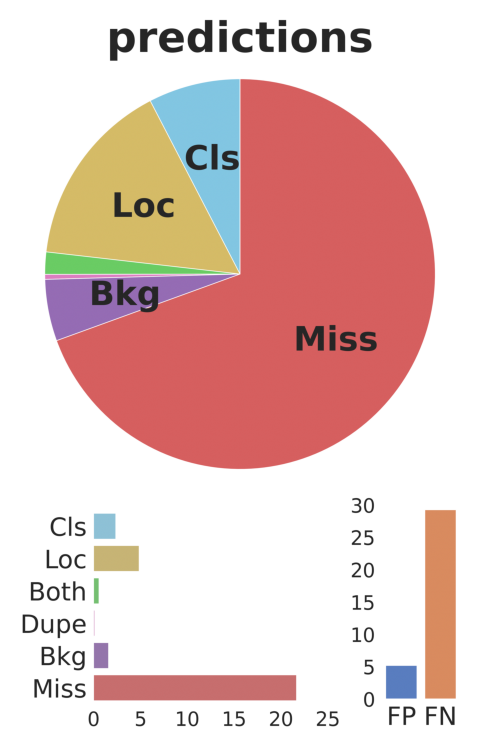

In [25]:
from tidecv import TIDE, datasets

tide = TIDE()
tide.evaluate(datasets.COCO(), datasets.COCOResult('predictions.json'), mode=TIDE.BOX) # Use TIDE.MASK for masks
tide.summarize()  # Summarize the results as tables in the console
tide.plot() 

In [26]:
import json
import numpy as np
from collections import defaultdict

# IoU computation in COCO format: [x, y, width, height]
def compute_iou(box1, box2):
    # Convert boxes to [x1, y1, x2, y2]
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2
    box1_coords = [x1, y1, x1 + w1, y1 + h1]
    box2_coords = [x2, y2, x2 + w2, y2 + h2]
    
    xi1 = max(box1_coords[0], box2_coords[0])
    yi1 = max(box1_coords[1], box2_coords[1])
    xi2 = min(box1_coords[2], box2_coords[2])
    yi2 = min(box1_coords[3], box2_coords[3])
    
    inter_width = max(0, xi2 - xi1)
    inter_height = max(0, yi2 - yi1)
    inter_area = inter_width * inter_height
    
    box1_area = w1 * h1
    box2_area = w2 * h2
    
    union_area = box1_area + box2_area - inter_area
    
    return inter_area / union_area if union_area != 0 else 0

# Load predictions (saved in COCO format)
with open("predictions.json", "r") as f:
    predictions = json.load(f)

# Load COCO ground truth annotations
with open('/kaggle/working/annotations/annotations/instances_val2017.json', "r") as f:
    coco_gt = json.load(f)

# Build a mapping: image_id -> list of ground truth annotations for that image
gt_by_image = defaultdict(list)
for ann in coco_gt["annotations"]:
    gt_by_image[ann["image_id"]].append(ann)

# Define IoU threshold to consider a prediction correct
iou_threshold = 0.5

# For each prediction, determine if it is correct.
# Here, a prediction is "correct" if it has IoU >= iou_threshold with any ground truth box (of the same category).
pred_results = []  # Each element is a tuple: (confidence, correctness: 1 for TP, 0 for FP)

index = 0
while index < len(predictions):
    pred = predictions[index]
    
    image_id = pred["image_id"]
    pred_bbox = pred["bbox"]  # [x, y, width, height]
    pred_category = pred["category_id"]
    pred_conf = pred["score"]
    
    # Get all ground truth boxes for this image with the same category
    gt_boxes = [ann["bbox"] for ann in gt_by_image[image_id] if ann["category_id"] == pred_category]
    
    max_iou = 0.0
    gt_index = 0
    while gt_index < len(gt_boxes):
        gt_bbox = gt_boxes[gt_index]
        iou = compute_iou(pred_bbox, gt_bbox)
        
        if iou > max_iou:
            max_iou = iou
        
        gt_index += 1  # Move to the next ground truth box
    
    correct = 1 if max_iou >= iou_threshold else 0
    pred_results.append((pred_conf, correct))
    
    index += 1  # Move to the next prediction



# Bin the predictions by confidence. We use 10 bins from 0 to 1.
num_bins = 35
bin_boundaries = np.linspace(0, 1, num_bins+1)
bin_acc = []   # accuracy in each bin
bin_conf = []  # average confidence in each bin
bin_counts = []  # number of predictions in each bin

bin_counts = []
bin_conf = []
bin_acc = []

index = 0
while index < num_bins:
    lower = bin_boundaries[index]
    upper = bin_boundaries[index + 1]
    
    # Include predictions with confidence > lower and <= upper
    bin_preds = [(conf, corr) for conf, corr in pred_results if conf > lower and conf <= upper]
    count = len(bin_preds)
    bin_counts.append(count)
    
    if count > 0:
        avg_conf = np.mean([conf for conf, corr in bin_preds])
        accuracy = np.mean([corr for conf, corr in bin_preds])
    else:
        avg_conf = 0
        accuracy = 0
    
    bin_conf.append(avg_conf)
    bin_acc.append(accuracy)
    
    index += 1  # Move to the next bin

total_preds = len(pred_results)
ece = 0.0

index = 0
while index < num_bins:
    weight = bin_counts[index] / total_preds if total_preds > 0 else 0
    ece += weight * abs(bin_acc[index] - bin_conf[index])
    index += 1  # Move to the next bin


print("Expected Calibration Error (ECE):", ece)


Expected Calibration Error (ECE): 0.07381181388059795


Saved predictions for small (7998), medium (13312), and large (13290) objects.

Evaluating TIDE statistics for small objects using predictions_small.json ...
-- predictions_small --

bbox AP @ 50: 9.39

                         Main Errors
  Type      Cls      Loc     Both     Dupe      Bkg     Miss  
-------------------------------------------------------------
   dAP     0.46     1.28     0.08     0.02     0.85    60.17  

        Special Error
  Type   FalsePos   FalseNeg  
-----------------------------
   dAP       1.55      70.95  



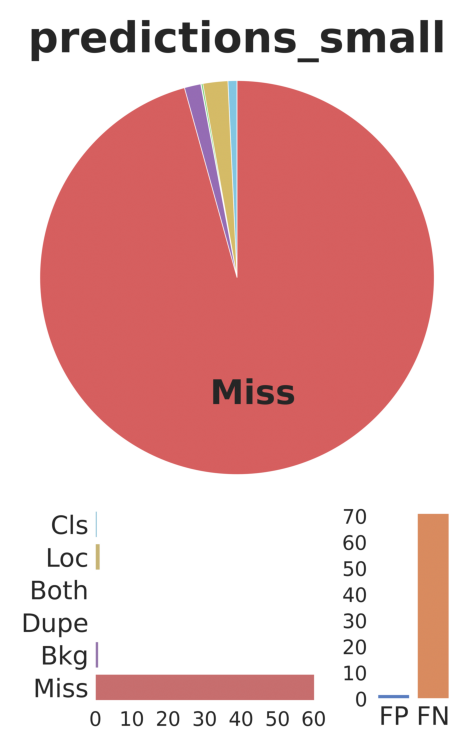


Evaluating TIDE statistics for medium objects using predictions_medium.json ...
-- predictions_medium --

bbox AP @ 50: 22.19

                         Main Errors
  Type      Cls      Loc     Both     Dupe      Bkg     Miss  
-------------------------------------------------------------
   dAP     0.64     2.34     0.24     0.02     0.94    58.00  

        Special Error
  Type   FalsePos   FalseNeg  
-----------------------------
   dAP       2.27      67.04  



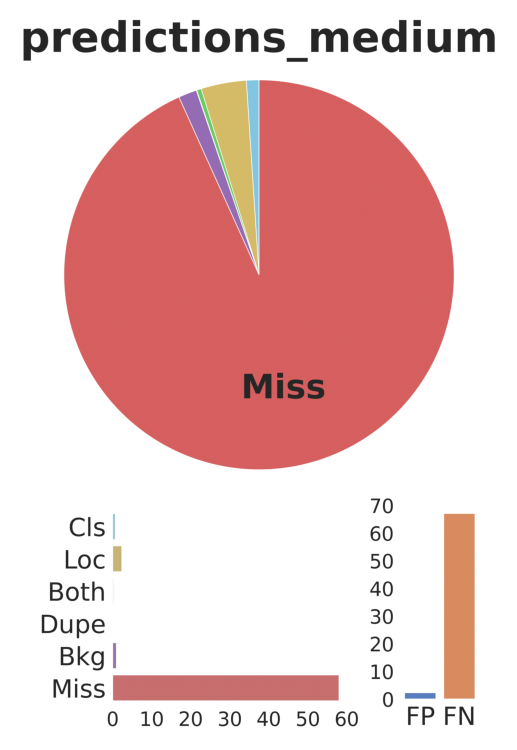


Evaluating TIDE statistics for large objects using predictions_large.json ...
-- predictions_large --

bbox AP @ 50: 31.29

                         Main Errors
  Type      Cls      Loc     Both     Dupe      Bkg     Miss  
-------------------------------------------------------------
   dAP     1.18     2.08     0.26     0.05     0.21    55.07  

        Special Error
  Type   FalsePos   FalseNeg  
-----------------------------
   dAP       1.56      62.91  



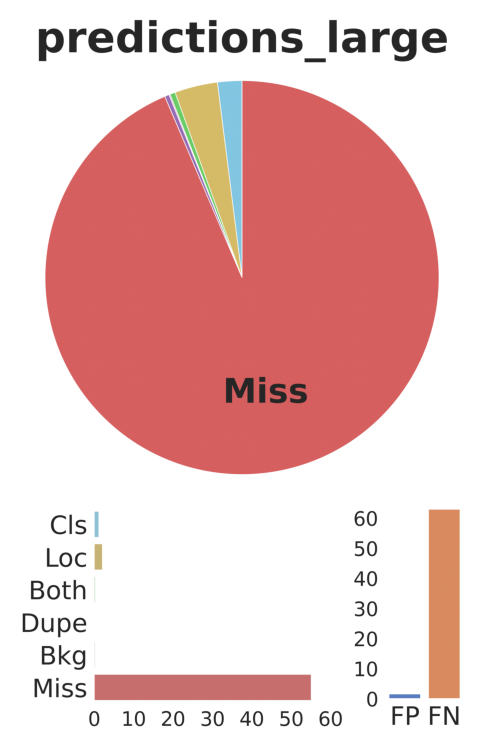


Computing ECE per scale:
ECE for small objects: 0.0814
ECE for medium objects: 0.0413
ECE for large objects: 0.0317


In [27]:
import os
import json
import numpy as np
from collections import defaultdict

# === STEP 0: Define scale thresholds ===
SMALL_THRESHOLD = 32 * 32    # 1296
MEDIUM_THRESHOLD = 96 * 96   # 9216

# === STEP 1: Load original predictions and split by scale ===

# Load full predictions file (COCO-format: each prediction has "bbox": [x, y, w, h])
with open("predictions.json", "r") as f:
    predictions = json.load(f)

# Filter predictions by area of predicted bbox
def area(bbox):
    # bbox is [x, y, width, height]
    return bbox[2] * bbox[3]

pred_small = [pred for pred in predictions if area(pred["bbox"]) < SMALL_THRESHOLD]
pred_medium = [pred for pred in predictions if SMALL_THRESHOLD <= area(pred["bbox"]) < MEDIUM_THRESHOLD]
pred_large = [pred for pred in predictions if area(pred["bbox"]) >= MEDIUM_THRESHOLD]

# Save scale-specific predictions files
with open("predictions_small.json", "w") as f:
    json.dump(pred_small, f)
with open("predictions_medium.json", "w") as f:
    json.dump(pred_medium, f)
with open("predictions_large.json", "w") as f:
    json.dump(pred_large, f)

print("Saved predictions for small (%d), medium (%d), and large (%d) objects." % 
      (len(pred_small), len(pred_medium), len(pred_large)))


# === STEP 2: Evaluate with TIDE for each scale ===
# (Assuming you have the TIDE API available)
from tidecv import TIDE, datasets

def evaluate_with_tide(pred_file, scale_label):
    tide = TIDE()
    print(f"\nEvaluating TIDE statistics for {scale_label} objects using {pred_file} ...")
    # Evaluate using TIDE.BOX mode; for instance segmentation, use TIDE.MASK
    tide.evaluate(datasets.COCO(), datasets.COCOResult(pred_file), mode=TIDE.BOX)
    tide.summarize()
    tide.plot()

evaluate_with_tide("predictions_small.json", "small")
evaluate_with_tide("predictions_medium.json", "medium")
evaluate_with_tide("predictions_large.json", "large")


# === STEP 3: Compute Expected Calibration Error (ECE) per scale ===

# Load ground truth annotations (COCO format)
with open('/kaggle/working/annotations/annotations/instances_val2017.json', "r") as f:
    coco_gt = json.load(f)

# Build a mapping from image_id to ground truth annotations
gt_by_image = defaultdict(list)
for ann in coco_gt["annotations"]:
    gt_by_image[ann["image_id"]].append(ann)

def compute_iou(box1, box2):
    # box: [x, y, width, height] --> [x1, y1, x2, y2]
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2
    box1_coords = [x1, y1, x1 + w1, y1 + h1]
    box2_coords = [x2, y2, x2 + w2, y2 + h2]
    xi1 = max(box1_coords[0], box2_coords[0])
    yi1 = max(box1_coords[1], box2_coords[1])
    xi2 = min(box1_coords[2], box2_coords[2])
    yi2 = min(box1_coords[3], box2_coords[3])
    inter_width = max(0, xi2 - xi1)
    inter_height = max(0, yi2 - yi1)
    inter_area = inter_width * inter_height
    area1 = w1 * h1
    area2 = w2 * h2
    union_area = area1 + area2 - inter_area
    return inter_area / union_area if union_area > 0 else 0

def compute_ece(filtered_predictions, scale_label, gt_filter_fn, iou_threshold=0.5, num_bins=10):
    """
    Compute Expected Calibration Error (ECE) for a set of predictions.
    - filtered_predictions: list of predictions for the given scale.
    - gt_filter_fn: a function that takes a ground truth annotation and returns True if it is in the desired scale.
    """
    # List of tuples: (confidence, correctness)
    results = []
    
    index = 0
    while index < len(filtered_predictions):
        pred = filtered_predictions[index]
        
        image_id = pred["image_id"]
        pred_bbox = pred["bbox"]
        pred_conf = pred["score"]
        pred_category = pred["category_id"]
        
        # Filter ground truth annotations for this image, same category, and matching scale (using gt_filter_fn)
        gt_boxes = [ann["bbox"] for ann in gt_by_image[image_id] 
                    if ann["category_id"] == pred_category and gt_filter_fn(ann)]
        
        max_iou = 0.0
        gt_index = 0
        while gt_index < len(gt_boxes):
            gt_bbox = gt_boxes[gt_index]
            iou = compute_iou(pred_bbox, gt_bbox)
            if iou > max_iou:
                max_iou = iou
            gt_index += 1  # Move to the next ground truth box
        
        correct = 1 if max_iou >= iou_threshold else 0
        results.append((pred_conf, correct))
        
        index += 1  # Move to the next prediction
    
    # Bin the predictions by confidence
    bin_boundaries = np.linspace(0, 1, num_bins + 1)
    bin_conf = []
    bin_acc = []
    bin_counts = []
    
    bin_index = 0
    while bin_index < num_bins:
        lower = bin_boundaries[bin_index]
        upper = bin_boundaries[bin_index + 1]
        
        # Include predictions with confidence > lower and <= upper
        bin_preds = [(conf, corr) for conf, corr in results if conf > lower and conf <= upper]
        count = len(bin_preds)
        bin_counts.append(count)
        
        if count > 0:
            avg_conf = np.mean([conf for conf, _ in bin_preds])
            accuracy = np.mean([corr for _, corr in bin_preds])
        else:
            avg_conf = 0
            accuracy = 0
        
        bin_conf.append(avg_conf)
        bin_acc.append(accuracy)
        
        bin_index += 1  # Move to the next bin
    
    total = len(results)
    ece = 0.0
    
    bin_weight_index = 0
    while bin_weight_index < num_bins:
        weight = bin_counts[bin_weight_index] / total if total > 0 else 0
        ece += weight * abs(bin_acc[bin_weight_index] - bin_conf[bin_weight_index])
        bin_weight_index += 1  # Move to the next bin
    
    print(f"ECE for {scale_label} objects: {ece:.4f}")
    return ece


# Define ground truth filter functions for each scale based on GT bbox area
def is_small(ann):
    return (ann["bbox"][2] * ann["bbox"][3]) < SMALL_THRESHOLD

def is_medium(ann):
    area_val = ann["bbox"][2] * ann["bbox"][3]
    return SMALL_THRESHOLD <= area_val < MEDIUM_THRESHOLD

def is_large(ann):
    return (ann["bbox"][2] * ann["bbox"][3]) >= MEDIUM_THRESHOLD

print("\nComputing ECE per scale:")
ece_small = compute_ece(pred_small, "small", is_small)
ece_medium = compute_ece(pred_medium, "medium", is_medium)
ece_large = compute_ece(pred_large, "large", is_large)


In [28]:
!pip install pycocotools tqdm tidecv

In [29]:
import numpy as np
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

from tidecv import TIDE, datasets

from dataclasses import dataclass
from typing import List, Tuple, Dict, Set
from tqdm import tqdm
from collections import defaultdict

In [30]:
@dataclass
class Detection:
    bbox: np.ndarray  # [x1, y1, x2, y2]
    class_id: int
    confidence: float

@dataclass
class GroundTruth:
    bbox: np.ndarray  # [x1, y1, x2, y2]
    class_id: int

In [31]:
def coco_to_corners(bbox):
    """Convert COCO bbox [x,y,w,h] to corners format [x1,y1,x2,y2]"""
    return np.array([
        bbox[0],
        bbox[1],
        bbox[0] + bbox[2],
        bbox[1] + bbox[3]
    ])

def get_image_annotations(coco_gt, coco_dt, img_id, max_dets=100):
    """Get list of ground truth and detection annotations across all images"""
    gt_ids = coco_gt.getAnnIds(imgIds=img_id)
    gt_anns = coco_gt.loadAnns(gt_ids)
    gts = [
        GroundTruth(
            bbox=coco_to_corners(ann['bbox']),
            class_id=ann['category_id']
        )
        for ann in gt_anns
    ]

    # Get detections
    dt_ids = coco_dt.getAnnIds(imgIds=img_id)
    dt_anns = coco_dt.loadAnns(dt_ids)
    if max_dets is not None:
        dt_anns = sorted(dt_anns, key=lambda x: x['score'], reverse=True)[:max_dets]
    dets = [
        Detection(
            bbox=coco_to_corners(ann['bbox']),
            class_id=ann['category_id'],
            confidence=ann['score']
        )
        for ann in dt_anns
    ]

    return gts, dets

def prepare_inputs(coco_gt, coco_dt, max_dets=100):
    """Convert COCO format to TIDE format for all images"""
    all_gts = []
    all_dets = []
    
    for img_id in tqdm(coco_gt.getImgIds(), desc="Processing images"):
        gts, dets = get_image_annotations(coco_gt, coco_dt, img_id, max_dets)
        all_gts.extend(gts)
        all_dets.extend(dets)
    
    return all_gts, all_dets

In [32]:
class SpatialGrid:
    def __init__(self, cell_size: int = 100):
        """A spatial indexing structure for efficient nearby object queries.
        
        This data structure divides 2D space into a grid and maintains a mapping of
        which objects overlap with each grid cell, enabling efficient spatial queries.
        """
        self.cell_size: int = cell_size
        # self.grid = defaultdict(list)
        self.grid: Dict[Tuple[int, int], List[int]] = defaultdict(list)
    
    def get_cell_coords(self, bbox: np.ndarray) -> Set[Tuple[int, int]]:
        """Get all grid cells that a bounding box overlaps with.
        
        Args:
            bbox: Bounding box coordinates [x1, y1, x2, y2]
                where (x1, y1) is the top-left corner and (x2, y2) is the bottom-right corner

        Returns:
            Set of (x, y) grid cell coordinates
        """
        x1, y1, x2, y2 = bbox
        start_x = int(x1 // self.cell_size)
        end_x = int(x2 // self.cell_size)
        start_y = int(y1 // self.cell_size)
        end_y = int(y2 // self.cell_size)
        return {(i, j) for i in range(start_x, end_x + 1) 
                       for j in range(start_y, end_y + 1)}
    
    def add_box(self, idx: int, bbox: np.ndarray):
        """Add a bounding box to the spatial grid.
        
        Args:
            idx: Index of the bounding box
            bbox: Bounding box coordinates [x1, y1, x2, y2]
        """
        cells = self.get_cell_coords(bbox)
        for cell in cells:
            self.grid[cell].append(idx)
    
    def get_nearby_indices(self, bbox: np.ndarray) -> Set[int]:
        """Get indices of bounding boxes that are near the given bounding box.
        
        Args:
            bbox: Bounding box coordinates [x1, y1, x2, y2]
            
        Returns:
            Set of indices of nearby bounding boxes
        """
        cells = self.get_cell_coords(bbox)
        nearby = set()
        for cell in cells:
            nearby.update(self.grid[cell])
        return nearby